## imports

In [ ]:
!pip install featuretools
!pip install pandas plotnine
!pip install -U featuretools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 618.3/618.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 10.5 MB/s eta 0:00:00


In [ ]:
import sqlite3
from sqlite3 import Error
import re # for RegularExpression
from operator import length_hint
import datetime, time
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd
from plotnine.data import mpg
from plotnine import ggplot, aes, geom_point, geom_col
import matplotlib.dates as mdates
import matplotlib.pylab as plt
import numpy as np
import featuretools as ft
import featuretools.primitives
import functools # Importing Python functools module which contains the reduce() function
import operator # Importing Python operator module which contains the add() function
from plotnine import *
from matplotlib import style
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.dates
from datetime import datetime        # Import datetime


In [ ]:
############################### Mount Google Drive and Authenticate ###############################
print("Mounting Google Drive and Authenticate ...")
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
print("Done")

In [ ]:
############################### Loading ##################################
print("Loading Data ...")

# Nour Locatoin
#Thefile="/content/drive/MyDrive/NORAH/wear_14.db" #

# plotting different
Thefile="/content/drive/MyDrive/WearablesData/DB/HuaweiF/wear_14_3.db" #working
path="/content/drive/MyDrive/WearablesData/DB/HuaweiF/Features/"
#Thefile="/content/drive/MyDrive/WearablesData/Dataset/3dTrial_Band_OneYear/wear_14.db" #working
#Thefile="/content/drive/MyDrive/WearablesData/Dataset/3dTrial_Band_OneYear/wear_14_3.db" #working



#Thefile="/content/drive/MyDrive/WearablesData/WMAmazfitB/HMCorePersistanceDatabaseV1.sqlite.db"
database=Thefile
print("Done")


"""
Dec /wear_14.db
March /wear_14_2
April /wear_14_3
"""


## DB Connection

In [ ]:
############################## Functions ###############################

def create_connection(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

## Generic

In [ ]:
def min_to_time(total_minutes):
  seconds=total_minutes*60
  time_string=time.strftime("%H:%M:%S", time.gmtime(seconds))
  return time_string # Prints '6:14' in this example

In [ ]:
def time_to_min(time_str):
 """Get seconds from time."""
 h, m, s = time_str.split(':')
 return int(h) * 3600 + int(m) * 60 + int(s)

## All - Selective - Master Tables

In [ ]:
def getAllTables(connection):
  cursor = connection.cursor()
  sqlite_select_query = 'SELECT name from sqlite_master where type= "table"'
  cursor.execute(sqlite_select_query)
  Tables = cursor.fetchall()
  no_of_table= len(Tables)
  print("Tables are:  ", Tables)
  print("Total Tables are:  ", no_of_table)
  return Tables,no_of_table

In [ ]:
def getSelectiveAndMasterTables(connection,list_table,no_of_table,list_feature,no_of_feature):
  # This functions gets all releated tables to a feature. AND it gets the representative tables with useful data
  # for each feature, iterate over the whole DB tables, then return tables with matched features
  SportTable,HeartTable,SleepTable,SpO2Table,BloodOxygenTable,StressTable= ([] for i in range(6))
  SportMasterTable,HeartMasterTable,SleepMasterTable,SpO2MasterTable,BloodOxygenMasterTable,StressMasterTable= ([] for i in range(6))
  for f in no_of_feature:
    TheFeature=list_feature[f-1]
    #print(TheFeature)
    for t in range(no_of_table):
      TheTable=list_table[t-1]
      #Check if the iterated table contains 'user ID':
      TheReg = re.search("\d{17,17}",str(TheTable))
      if TheReg:
      #Check if the iterated table contains the feature:
        x = re.search(TheFeature,str(TheTable))
        if x != None:
          if TheFeature =="Sport":
            SportTable.append(TheTable)
            y = re.search("ByQuarter",str(TheTable))
            if y != None:
              SportMasterTable.append(TheTable)
          elif TheFeature =="Heart":
            HeartTable.append(TheTable)
            y = re.search("ByDay",str(TheTable))
            if y != None:
              HeartMasterTable.append(TheTable)
          elif TheFeature =='Sleep':
            SleepTable.append(TheTable)
            y = re.search("ByDay",str(TheTable))
            if y != None:
              SleepMasterTable.append(TheTable)
          elif TheFeature =='SpO2':
            SpO2Table.append(TheTable)
            y = re.search("ByDay",str(TheTable))
            if y != None:
              SpO2MasterTable.append(TheTable)
          elif TheFeature =='BloodOxygen':
            BloodOxygenTable.append(TheTable)
            y = re.search("ByDay",str(TheTable))
            if y != None:
              BloodOxygenMasterTable.append(TheTable)
          elif TheFeature =='Stress':
            StressTable.append(TheTable)
            y = re.search("ByDay",str(TheTable))
            if y != None:
              StressMasterTable.append(TheTable)

  print("Slective SportTable:",SportTable, len(SportTable))
  print("Slective HeartTable:",HeartTable, len(HeartTable))
  print("Slective SleepTable:",SleepTable,len(SleepTable))
  print("Slective SpO2Table:",SpO2Table, len(SpO2Table))
  print("Slective BloodOxygenTable:",BloodOxygenTable, len(BloodOxygenTable))
  print("Slective StressTable:",StressTable, len(StressTable))

  print("Master SportTable:",SportMasterTable, len(SportMasterTable))
  print("Master HeartTable:",HeartMasterTable, len(HeartMasterTable))
  print("Master SleepTable:",SleepMasterTable,len(SleepMasterTable))
  print("Master SpO2Table:",SpO2MasterTable, len(SpO2MasterTable))
  print("Master BloodOxygenTable:",BloodOxygenMasterTable, len(BloodOxygenMasterTable))
  print("Master StressTable:",StressMasterTable, len(StressMasterTable))
  return SportTable,HeartTable,SleepTable,SpO2Table,BloodOxygenTable,StressTable,SportMasterTable,HeartMasterTable,SleepMasterTable,SpO2MasterTable,BloodOxygenMasterTable,StressMasterTable
      #  slective_tables.append(x)
  #print(slective_tables)

## Get

In [ ]:
def getMasterTableData(connection,feature,table):#'Heart','BloodOxygen','Stress'
  #MasterCloumnsList=[]
  df = pd.DataFrame()
  cursor = connection.cursor()
  if feature == 'Heart':
    MasterCloumns="TimeStamp,MaxRate,MinRate,AverageRestRate"
  elif feature == 'Stress':
    MasterCloumns="TimeStamp,MaxStress,MinStress,AverageStress"
  elif feature =="BloodOxygen":
    MasterCloumns="TimeStamp,MaxBloodOxygen,MinBloodOxygen,AverageBloodOxygen"
  table=table[0]
  print("table with index 0", table)
  table = functools.reduce(operator.add, table)
  MasterCloumns=format(MasterCloumns)
  sql_stmt="SELECT "+MasterCloumns+" FROM "+table
  print("sql_stmt", sql_stmt)

  cursor.execute(sql_stmt)
  rows = cursor.fetchall()

  MasterCloumnsList = MasterCloumns.split(',')
  df = pd.DataFrame(rows, columns = MasterCloumnsList)
  df.drop_duplicates(inplace=True)


  #df.drop(df[(df['MaxRate'] == 0) | (df['MinRate'] == 0) | (df['AverageRestRate'] == 0)].index, inplace=True)
  df["TimeStamp"]=pd.to_datetime(df["TimeStamp"], format='%Y%m%d') # we need to conver it from into to dataframe for plotting purposes

  #df["TimeStamp"]=pd.to_datetime(df["TimeStamp"], format='%Y%m%d%H:%M:%S') # we need to conver it from into to dataframe for plotting purposes

  # drop values with zero.
  #df = df[df.iloc[:, 2:3] != 0]
  #col=df.iloc[:, 1:2]
  #print("col is :", col)
  #df= df.drop(df[(df[col] == 0)].index,inplace=True)
  #df.drop(df[(df['MaxRate'] == 0) | (df['MinRate'] == 0) | (df['AverageRestRate'] == 0)].index, inplace=True)

  return df

In [ ]:
import datetime, time
def getSleepData(connection):
  table=['m_14_FineSleepDayMergeTable_10966000026997291']
  table=table[0]
  MasterCloumns="TimeStamp, FallAsleepTime, WakeUpTime, AllSleepTime, DeepSleepTime, LightSleepTime, SleepDreamTime, AwakeSleepTime, SleepNapTime,AwakeTimes, SleepScore"
  MasterCloumns=format(MasterCloumns)
  sql_stmt="SELECT "+MasterCloumns+" FROM "+table

  # SEdit
  #print("sql_stmt", sql_stmt)


  cursor = connection.cursor()
  cursor.execute(sql_stmt)
  rows = cursor.fetchall()

  #exlude zero values
  sleep_df = pd.DataFrame(rows, columns =['TimeStamp', 'FallAsleepTime', 'WakeUpTime', 'AllSleepTime', 'DeepSleepTime', 'LightSleepTime', 'SleepDreamTime', 'AwakeSleepTime', 'SleepNapTime', 'AwakeTimes','SleepScore'])
  sleep_df.drop(sleep_df[(sleep_df['FallAsleepTime'] == 0) | (sleep_df['WakeUpTime'] == 0)].index, inplace=True)
  #print(sleep_df)
  #sleep_df.info()



  sleep_df_processed=sleep_df.copy()
  #sleep_df_processed['TimeStamp'] = sleep_df_processed.to_datetime(sleep_df_processed['TimeStamp'].astype(str), format='%Y%m%d')
  sleep_df_processed["TimeStamp"]=pd.to_datetime(sleep_df_processed["TimeStamp"], format='%Y%m%d') # we need to conver it from into to dataframe for plotting purposes
  sleep_df_processed['FallAsleepTime'] = sleep_df_processed['FallAsleepTime'].apply(str)
  sleep_df_processed['WakeUpTime'] = sleep_df_processed['WakeUpTime'].apply(str)
  sleep_df_processed['FATime'], sleep_df_processed['WUTime']=0,0
  sleep_df_processed['AllSleepTime_'],sleep_df_processed['DeepSleepTime_'],sleep_df_processed['LightSleepTime_'],sleep_df_processed['SleepDreamTime_'],sleep_df_processed['AwakeSleepTime_'],sleep_df_processed['SleepNapTime_']=0,0,0,0,0,0


  for i, row in sleep_df.iterrows():
    for col in sleep_df.columns:

      dataOriginalFAT,dataOriginalWUT= sleep_df.at[i,'FallAsleepTime'], sleep_df.at[i,'WakeUpTime']
      dataProcessedFAT,dataProcessedWUT=datetime.datetime.fromtimestamp(dataOriginalFAT),datetime.datetime.fromtimestamp(dataOriginalWUT)

      dataOriginalAllSleepTime,dataOriginalDeepSleepTime,dataOriginalLightSleepTime,dataOriginalSleepDreamTime,dataOriginalAwakeSleepTime,dataOriginalSleepNapTime = sleep_df.at[i,'AllSleepTime'], sleep_df.at[i, 'DeepSleepTime'], sleep_df.at[i, 'LightSleepTime'], sleep_df.at[i, 'SleepDreamTime'],sleep_df.at[i, 'AwakeSleepTime'], sleep_df.at[i, 'SleepNapTime']
      dataProcessedAllSleepTime,dataProcessedDeepSleepTime,dataProcessedLightSleepTime,dataProcessedSleepDreamTime,dataProcessedAwakeSleepTime,dataProcessedSleepNapTime=min_to_time(dataOriginalAllSleepTime),min_to_time(dataOriginalDeepSleepTime),min_to_time(dataOriginalLightSleepTime),min_to_time(dataOriginalSleepDreamTime),min_to_time(dataOriginalAwakeSleepTime),min_to_time(dataOriginalSleepNapTime)

      FATime=dataProcessedFAT.time()
      WUTime=dataProcessedWUT.time()

      dataProcessedFAT,dataProcessedWUT=dataProcessedFAT.strftime("%Y-%m-%d %H:%M:%S"),dataProcessedWUT.strftime("%Y-%m-%d %H:%M:%S")



      sleep_df_processed.at[i,'AllSleepTime_'],sleep_df_processed.at[i,'DeepSleepTime_'],sleep_df_processed.at[i,'LightSleepTime_'],sleep_df_processed.at[i,'SleepDreamTime_'],sleep_df_processed.at[i,'AwakeSleepTime_'],sleep_df_processed.at[i,'SleepNapTime_'],=dataProcessedAllSleepTime,dataProcessedDeepSleepTime,dataProcessedLightSleepTime,dataProcessedSleepDreamTime,dataProcessedAwakeSleepTime,dataProcessedSleepNapTime
      sleep_df_processed.at[i,'FallAsleepTime'], sleep_df_processed.at[i,'FATime'],sleep_df_processed.at[i,'WakeUpTime'], sleep_df_processed.at[i,'WUTime'] = dataProcessedFAT,FATime,dataProcessedWUT,WUTime

  # SEdit
  #print(sleep_df_processed)
  #print(sleep_df_processed.info())
  #plotTimeSeries(sleep_df_processed['TimeStamp'], sleep_df_processed['SleepDuration'])

  #ORDER COLUMNS
  #columns =['TimeStamp', 'FallAsleepTime', 'FATime', 'WakeUpTime', 'AllSleepTime', 'DeepSleepTime', 'LightSleepTime', 'SleepDreamTime', 'AwakeSleepTime', 'SleepNapTime', 'AwakeTimes','SleepScore']
  #sleep_df_processed=df[columns]

  return sleep_df_processed


In [ ]:
def getSleepStatistics(df):
  """
0   TimeStamp           55 non-null     datetime64[ns]
 1   FallAsleepTime      55 non-null     object
 2   WakeUpTime          55 non-null     object
 3   AllSleepTime        55 non-null     int64
 4   DeepSleepTime       55 non-null     int64
 5   LightSleepTime      55 non-null     int64
 6   SleepDreamTime      55 non-null     int64
 7   AwakeSleepTime      55 non-null     int64
 8   SleepNapTime        55 non-null     int64
 9   AwakeTimes          55 non-null     int64
 10  SleepScore          55 non-null     int64
 11  FATime              55 non-null     object
 12  WUTime              55 non-null     object
 13  AllSleepTime_min    55 non-null     object
 14  DeepSleepTime_min   55 non-null     object
 15  LightSleepTime_min  55 non-null     object
 16  SleepDreamTime_min  55 non-null     object
 17  AwakeSleepTime_min  55 non-null     object
 18  SleepNapTime_min    55 non-null     object
 """
  ############################################ Sleep Statistics ############################################
  df=df.iloc[:,3:11]
  df_stat = df.mean(axis=0)
  # for index, row in df_stat.iterrows():
  #   val=min_to_time(row)
  #   print(val)

  for index, value in df_stat.items():
    val=min_to_time(value)
    print(f"Index : {index}, Value : {val}")

  return df_stat


In [ ]:
def getStepsCaloriesData(connection):
  ListTables=['m_14_SportDataByDayTemp_10966000026997291']
  cursor = connection.cursor()
  sql_stmt="SELECT TimeStamp, TotalSteps, TotalCalories FROM m_14_SportDataByDayTemp_10966000026997291"
  cursor.execute(sql_stmt)
  rows = cursor.fetchall()


  StepsCalories_df = pd.DataFrame(rows, columns =['TimeStamp', 'TotalSteps','TotalCalories'])
  #exlude zero values
  #stress_df.drop(stress_df[(stress_df['MaxStress'] == 0) | (stress_df['MinStress'] == 0) | (stress_df['AverageStress'] == 0)].index, inplace=True)

  StepsCalories_df['TotalCalories'] = StepsCalories_df['TotalCalories'].div(1000).round(2)

  StepsCalories_df["TimeStamp"]=pd.to_datetime(StepsCalories_df["TimeStamp"], format='%Y%m%d%H') # we need to conver it from into to dataframe for plotting purposes

  #print(HR_df)
  return StepsCalories_df


#preprocessing

In [ ]:
# تنقل الوقت time interval: diffrences among one columns; 12:10 -> 12:20 -> 12:25 -> 12:30
# كم المدة اللي ودي اعتبرها للتنقل --> يوم time window: unified among all columns
'''
mappingMatrix = np.array( [['Sleep', "wear_14","m_14_FineSleepDayMergeTable_"],
                    ['HR', "wear_14", "m_14_HeartRateByDay_"],
                    ['Stress', "wear_14", "m_14_StressDataByDay_"],
                    ['Activity', "wear_14", "m_14_SportDataByDayTemp_"],
                    ['BloodOxygen', "wear_14", "m_14_BloodOxygenByDay_"],
                    ['SpO2', "wear_7", "FitnessSpO2TotalTable_"]])
'''

'''
*********** Sleep  ***********
1- Sometimes [LightSleepTime=0 + DeepSleepTime=0 + SleepDreamTime=0] BUT [SleepNapTime !=0] ; this person had a sleep only
   Sometimes [LightSleepTime!=0 + DeepSleepTime!=0 + SleepDreamTime!=0] BUT [SleepNapTime =0] ; this person had a nap only
   Sometimes [LightSleepTime !=0 + DeepSleepTime !=0 + SleepDreamTime !=0 + SleepNapTime !=0] ; this person had a sleep and a nap
2- There is a row with date and all coulmns =0 ; drop
    p_df=df[(df['LightSleepTime'] == 0) & (df['DeepSleepTime'] == 0) & (df['SleepNapTime'] == 0) & (df['SleepDreamTime'] == 0)]
2- AllSleepTime=LightSleepTime + DeepSleepTime + SleepDreamTime
*********** Heart Rate ***********
1- if MaxRate	AND MinRate AND	AverageRestRate =0 ; drop
2- if (MaxRate	AND MinRate ) != 0 AND	(AverageRestRate = 0) ; Keep
*********** Blood Oxygen ***********
- No need for columns
*********** Blood Pressure ***********
- Pending
*********** Activity ***********
- No need for columns
*********** Strees ***********
- No need for columns



'''

def preprocessing(df):
  if feature=='Sleep':
    p_df=df[(df['LightSleepTime'] != 0) | (df['DeepSleepTime'] != 0) | (df['SleepNapTime'] != 0) | (df['SleepDreamTime'] != 0)]
    print('done')
  elif feature =='HR':
    p_df=df[(df['MaxRate'] != 0) & (df['MinRate'] != 0)]
    print('done')
  elif feature =='BloodOxygen':
    p_df=df
  elif feature =='SpO2':
    p_df=df
  elif feature =='Activity':
    p_df=df
  elif feature =='Stress':
    p_df=df

  return p_df


# PloT

##plotTimeSeries_Min_Max_Avg

In [ ]:
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
import numpy as np

import matplotlib as mpl


def plotTimeSeries_Min_Max_Avg(df,feature):
  plt.clf()
  #data
  dates = df_new = df.iloc[:, 0:1]
  Max=  df_new = df.iloc[:, 1:2]
  Min= df.iloc[:, 2:3]
  Avg= df.iloc[:, 3:4]

  #plot

  # SEdit:

  # Sources:
  # https://www.geeksforgeeks.org/matplotlib-pyplot-plot_date-in-python/
  # https://stackoverflow.com/questions/45716189/matplotlib-plot-date-x-axis-labels-off-by-days-and-partially-missing
  # https://stackoverflow.com/questions/51828205/dates-overcrowding-on-x-axis-of-plot-python

  #plt.plot_date(dates, Min ,label = "Min", color='g')
  #plt.plot_date(dates, Avg ,label = "Avg",color='orange')
  #plt.plot_date(dates, Max ,label = "Max", color='r')

  fig, ax = plt.subplots()

  # Create figure and plot space
  #fig = plt.figure(figsize=(50, 10))
  #ax = fig.add_subplot()



###### MONTHLY ######
  ax.plot_date(dates, Min ,label = "Min", color='g')
  ax.plot_date(dates, Avg ,label = "Avg",color='orange')
  ax.plot_date(dates, Max ,label = "Max", color='r')

  locator = mpl.dates.MonthLocator()
  ax.xaxis.set_major_locator(locator)
  ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y-%m'))

###### END of MONTHLY ######

###### Daily ######
  # ax.plot_date(dates[0:30], Min[0:30] ,label = "Min", color='g')
  # ax.plot_date(dates[0:30], Avg[0:30] ,label = "Avg",color='orange')
  # ax.plot_date(dates[0:30], Max[0:30] ,label = "Max", color='r')

  # locator = mpl.dates.DayLocator()
  # ax.xaxis.set_major_locator(locator)
  # ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y-%m-%d'))

###### End of Daily ######

  # Very useful for rotating and resizing ticks
  #ax.xaxis.set_tick_params(rotation=270, labelsize=5)

  ax.xaxis.set_tick_params(rotation=90)
  #plt.tight_layout()

 #labeling
  plt.title('Average per dates', fontweight="bold")
  plt.xlabel('Date')
  plt.ylabel(feature)
  #plt(style="-o")

  #display

  plt.show()


##plotTimeSeries_Sleep

In [ ]:


def plotTimeSeries_Sleep(df):
  #data
  dates=df["TimeStamp"]
  fat=df["FATime"]
  wut=df["WUTime"]
  sd=df["SleepDuration"]


  #plot

  # SEdit

  fig, ax = plt.subplots()

  ax.plot_date(dates,sd)

  locator = mpl.dates.DayLocator()
  ax.xaxis.set_major_locator(locator)
  ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y-%m-%d'))
  ax.xaxis.set_tick_params(rotation=90, labelsize=5)

  plt.style.use('seaborn')
  plt.tight_layout()

  #labeling
  plt.title('Sleeping hours per dates', fontweight="bold")
  plt.xlabel('Date')
  plt.ylabel('Sleeping hours')

  #show
  plt.show()


  ggplot(df) + aes(x=dates, y=fat, xend=wut) + geom_point()
  #+ geom_dumbbell(size=1.25, color="Gray",colour_x = "Blue", colour_xend = "Red",size_x=4,size_xend=4) + labs(x="Temperature", y="Month", title="London Monthly Temperatures 2018")



##plotTimeSeries_SleepStatus

In [ ]:
from datetime import datetime as dt       # Import datetime

def plotTimeSeries_SleepStatus(df):
  ############################################ SleepLevels ############################################
  #colors
  colors = sns.color_palette("mako",n_colors=5)
  cmap1 = LinearSegmentedColormap.from_list("my_colormap", colors)
  # Convert TimeStamp column to dateTime type
  #df["TimeStamp"]=pd.to_datetime(df["TimeStamp"], format='%Y%m%d')
  df["TimeStamp"]=pd.to_datetime(df["TimeStamp"])

  # Sort the values by TimeStamp
  df.sort_values(by='TimeStamp',ascending=True)

  dateRange = pd.date_range(df['TimeStamp'].values[0], df['TimeStamp'].values[-1])

  dateRange.to_pydatetime()


  for x in range(df['TimeStamp'].size -1):
    for y in range(dateRange.size -1):
      if(dateRange[y] == df['TimeStamp'].values[x]):
       dateRange = dateRange.delete(y)


  for x in range(dateRange.size-1): #SIZE 93 ? No
      df = df.append({'TimeStamp': dateRange[x]}, ignore_index=True)

  df["TimeStamp"]=pd.to_datetime(df["TimeStamp"], format='%Y%m%d') # we need to conver it from into to dataframe for plotting purposes
  df.set_index('TimeStamp', inplace=True)
  # df.sort_values(by='TimeStamp',ascending=True)
  df = df.sort_values(by = 'TimeStamp')

  print(df.to_markdown())
  #data
  dates= df.iloc[:, 0:1]


  # SEdit

  # Useful Resource
  # https://plotly.com/python/time-series/

  #ax = df.iloc[:, 4:9].plot.bar(align='center', stacked=True, colormap=cmap1, figsize=(10, 6), y=dates)
  #df.index = dates
  ax = df.iloc[:, 4:9].plot.bar(align='center', stacked=True, colormap=cmap1, figsize=(40, 24))

  # use the plt.xticks function to custom labels
  #y_pos = np.arange(len(dates))
  #plt.xticks(y_pos, dates)

  ax.xaxis.set_tick_params(rotation=90, labelsize=5)

  #labeling
  title = plt.title('Sleep Status', pad=60, fontsize=18)
  title.set_position([.5, 1.02])
  plt.subplots_adjust(top=0.8, left=0.26) # Adjust the subplot so that the title would fit

  #ax.set_xticklabels(dates)

  #ax.xaxis.set_major_formatter(dates)

  ax.grid(True)

  # SEdit
  #for label in (ax.get_xticklabels() + ax.get_yticklabels()):
  for label in (ax.get_yticklabels()):
      label.set_fontsize(8)
      label.set(rotation=45, horizontalalignment='right')

  legend = plt.legend(loc='best',frameon=False, mode='expand', ncol=5, borderaxespad=-.46, prop={'size': 8})

  for text in legend.get_texts():
      plt.setp(text) # legend font color

  plt.title('Sleeping hours per dates', fontweight="bold")
  plt.xlabel('Date')
  plt.ylabel('Sleeping status')

  #show
  plt.show()

"""
FineSleepDayMergeTable
0   TimeStamp           55 non-null     datetime64[ns]
 1   FallAsleepTime      55 non-null     object
 2   WakeUpTime          55 non-null     object
 3   AllSleepTime        55 non-null     int64
 4   DeepSleepTime       55 non-null     int64
 5   LightSleepTime      55 non-null     int64
 6   SleepDreamTime      55 non-null     int64
 7   AwakeSleepTime      55 non-null     int64
 8   SleepNapTime        55 non-null     int64
 9   AwakeTimes          55 non-null     int64
 10  SleepScore          55 non-null     int64
 11  FATime              55 non-null     object
 12  WUTime              55 non-null     object
 13  AllSleepTime_min    55 non-null     object
 14  DeepSleepTime_min   55 non-null     object
 15  LightSleepTime_min  55 non-null     object
 16  SleepDreamTime_min  55 non-null     object
 17  AwakeSleepTime_min  55 non-null     object
 18  SleepNapTime_min    55 non-null     object
 """

'\nFineSleepDayMergeTable\n0   TimeStamp           55 non-null     datetime64[ns]\n 1   FallAsleepTime      55 non-null     object\n 2   WakeUpTime          55 non-null     object\n 3   AllSleepTime        55 non-null     int64\n 4   DeepSleepTime       55 non-null     int64\n 5   LightSleepTime      55 non-null     int64\n 6   SleepDreamTime      55 non-null     int64\n 7   AwakeSleepTime      55 non-null     int64\n 8   SleepNapTime        55 non-null     int64\n 9   AwakeTimes          55 non-null     int64\n 10  SleepScore          55 non-null     int64\n 11  FATime              55 non-null     object\n 12  WUTime              55 non-null     object\n 13  AllSleepTime_min    55 non-null     object\n 14  DeepSleepTime_min   55 non-null     object\n 15  LightSleepTime_min  55 non-null     object\n 16  SleepDreamTime_min  55 non-null     object\n 17  AwakeSleepTime_min  55 non-null     object\n 18  SleepNapTime_min    55 non-null     object\n '

##plotSleepStatistics

In [ ]:
def plotSleepStatistics(df_stat):
  """
 0   AllSleepTime        55 non-null     int64
 1   DeepSleepTime       55 non-null     int64
 2   LightSleepTime      55 non-null     int64
 3   SleepDreamTime      55 non-null     int64
 4   AwakeSleepTime      55 non-null     int64
 5   SleepNapTime        55 non-null     int64
 6   AwakeTimes          55 non-null     int64
 7  SleepScore          55 non-null     int64
 """
  # SEdit
  #print("******df_stat.info*****")
  #print(df_stat)
  #print(df_stat.info)

  df_stat=df_stat[1:6]
  labels=df_stat.index

  # sizes=df_stat
  # labels

  N=5
  colors = np.random.rand(N)

  my_circle = plt.Circle((0, 0), 0.7, color='white')

  d = plt.pie(df_stat, labels=labels, autopct='%1.1f%%',startangle=180, labeldistance=1.05)
  plt.style.use('seaborn')


  plt.axis('equal')
  plt.gca().add_artist(my_circle)

  # plt.show()


## plotTimeSeries_Activity

In [ ]:
  def plotTimeSeries_Activity(df):
    dates=df["TimeStamp"]
    steps=df["TotalSteps"]
    calories=df["TotalCalories"]

    ax = plt.subplot(111)
    ax.bar(dates, steps, width=3, label = steps, color='g')
    ax.bar(dates, calories, width=3, label = calories, color='r')
    ax.xaxis_date()
    #ax.legend()
    plt.show()

    #print
    plt.style.use('seaborn')
    #plt.plot_date(dates, Min ,label = "Min", color='g',linestyle = 'dotted or dashed')
    plt.plot_date(dates, steps ,label = steps, color='r')
    plt.plot_date(dates, calories ,label = calories, color='b')
    #plt.legend()

    plt.show()

In [ ]:
  #print(plt.style.available)

# Configuration

In [ ]:
Wearable_Manufacturers="""
*****************************************
Wearable Manufacturer is
1- Huawei smartwatch fit 2
2- Huawei band 7
3- Amazfit band 7

*****************************************
"""
print(Wearable_Manufacturers)
print("Select Wearable Manufacturer")


*****************************************
Wearable Manufacturer is
1- Huawei smartwatch fit 2
2- Huawei band 7
3- Amazfit band 7

*****************************************

Select Wearable Manufacturer


In [ ]:
Wearable_Product=1

In [ ]:
#Sleep monitoring - 	HR monitoring	- Oxygen saturation measurement -	Blood pressure measurement- Body temperature monitoring	- Activity tracking - Stress measurement
# list_feature =  ['Sleep', 'HR','SpO2','BloodPressure','Temprature','Activity','Stress']


if Wearable_Product ==1: #WMHuaweiFit2
  #list_feature =  ['Sleep']
  #no_of_feature = [1]
  list_feature =  ['Sleep', 'Heart','BloodOxygen','Activity','Stress']
  no_of_feature = [1,2,3,4,5]
elif Wearable_Product ==2: #WMHuaweiBand7
  #list_feature =  ['Sleep']
  #no_of_feature = [1]
  list_feature =  ['Sleep', 'Heart','Activity','Stress']
  no_of_feature = [1,2,3,4]
elif Wearable_Product ==3: #WMAmazfitBand7
  list_feature =  ['Sleep', 'Heart','SpO2','Activity','Stress']
  no_of_feature = [1,2,3,4,5]


#Main

In [ ]:
connection = create_connection(database)
# SEdit
#print(connection)

with connection:
  print("1. print all tables - Logical Extraction")
  list_table,no_of_table=getAllTables(connection)
  #print(Tables,no_of_table )


1. print all tables - Logical Extraction
Tables are:   [('m_14_SportDataByQuarter_temp_user',), ('m_14_SleepDataByDay_temp_user',), ('m_14_SportDataByDay_temp_user',), ('m_14_HeartRateByDay_temp_user',), ('m_14_DataSourceTable_temp_user',), ('m_14_FineSleepStatusTable_temp_user',), ('m_14_FineSleepDayTable_temp_user',), ('sqlite_sequence',), ('m_14_FineSleepDayMergeTable_temp_user',), ('m_14_FineSleepMergeTable_temp_user',), ('m_14_StressDataByDay_temp_user',), ('m_14_BloodOxygenByDay_temp_user',), ('m_14_CommonStatisticsTableByDay_temp_user',), ('m_14_RunningQuality_temp_user',), ('m_14_SportDataByQuarter_10966000026997291',), ('m_14_SportDataByDay_10966000026997291',), ('m_14_SleepDataByDay_10966000026997291',), ('m_14_HeartRateByDay_10966000026997291',), ('m_14_BloodOxygenByDay_10966000026997291',), ('m_14_DataSourceTable_10966000026997291',), ('m_14_FineSleepStatusTable_10966000026997291',), ('m_14_FineSleepDayTable_10966000026997291',), ('m_14_FineSleepDayMergeTable_10966000026997

************************************************************
Print content of Sleep feature
1197
TimeStamp          datetime64[ns]
FallAsleepTime             object
WakeUpTime                 object
AllSleepTime                int64
DeepSleepTime               int64
LightSleepTime              int64
SleepDreamTime              int64
AwakeSleepTime              int64
SleepNapTime                int64
AwakeTimes                  int64
SleepScore                  int64
FATime                     object
WUTime                     object
AllSleepTime_              object
DeepSleepTime_             object
LightSleepTime_            object
SleepDreamTime_            object
AwakeSleepTime_            object
SleepNapTime_              object
dtype: object
|    | TimeStamp           | FallAsleepTime      | WakeUpTime          |   AllSleepTime |   DeepSleepTime |   LightSleepTime |   SleepDreamTime |   AwakeSleepTime |   SleepNapTime |   AwakeTimes |   SleepScore | FATime   | WUTime   | AllSleepT

<ipython-input-48-ccfce8e95cb3>:29: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
<ipython-input-47-bc13ec0fea50>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<ipython-input-47-bc13ec0fea50>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<ipython-input-47-bc13ec0fea50>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<ipython-input-47-bc13ec0fea50>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<ipython-inp

| TimeStamp           | FallAsleepTime      | WakeUpTime          |   AllSleepTime |   DeepSleepTime |   LightSleepTime |   SleepDreamTime |   AwakeSleepTime |   SleepNapTime |   AwakeTimes |   SleepScore | FATime   | WUTime   | AllSleepTime_   | DeepSleepTime_   | LightSleepTime_   | SleepDreamTime_   | AwakeSleepTime_   | SleepNapTime_   |
|:--------------------|:--------------------|:--------------------|---------------:|----------------:|-----------------:|-----------------:|-----------------:|---------------:|-------------:|-------------:|:---------|:---------|:----------------|:-----------------|:------------------|:------------------|:------------------|:----------------|
| 2022-05-13 00:00:00 | 2022-05-12 23:53:00 | 2022-05-13 05:32:00 |            291 |             118 |              111 |               62 |               48 |              0 |            1 |           77 | 23:53:00 | 05:32:00 | 04:51:00        | 01:58:00         | 01:51:00          | 01:02:00          | 00:48:

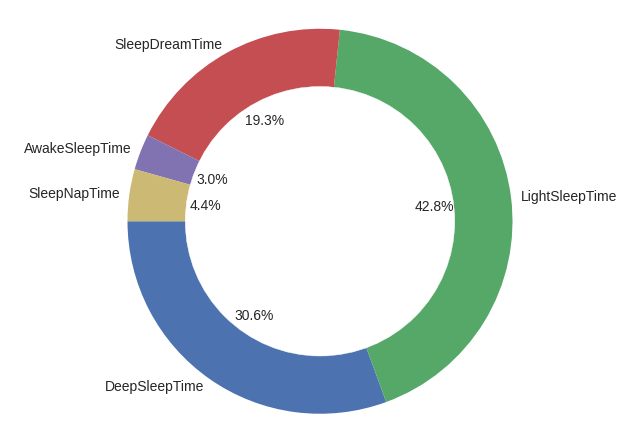

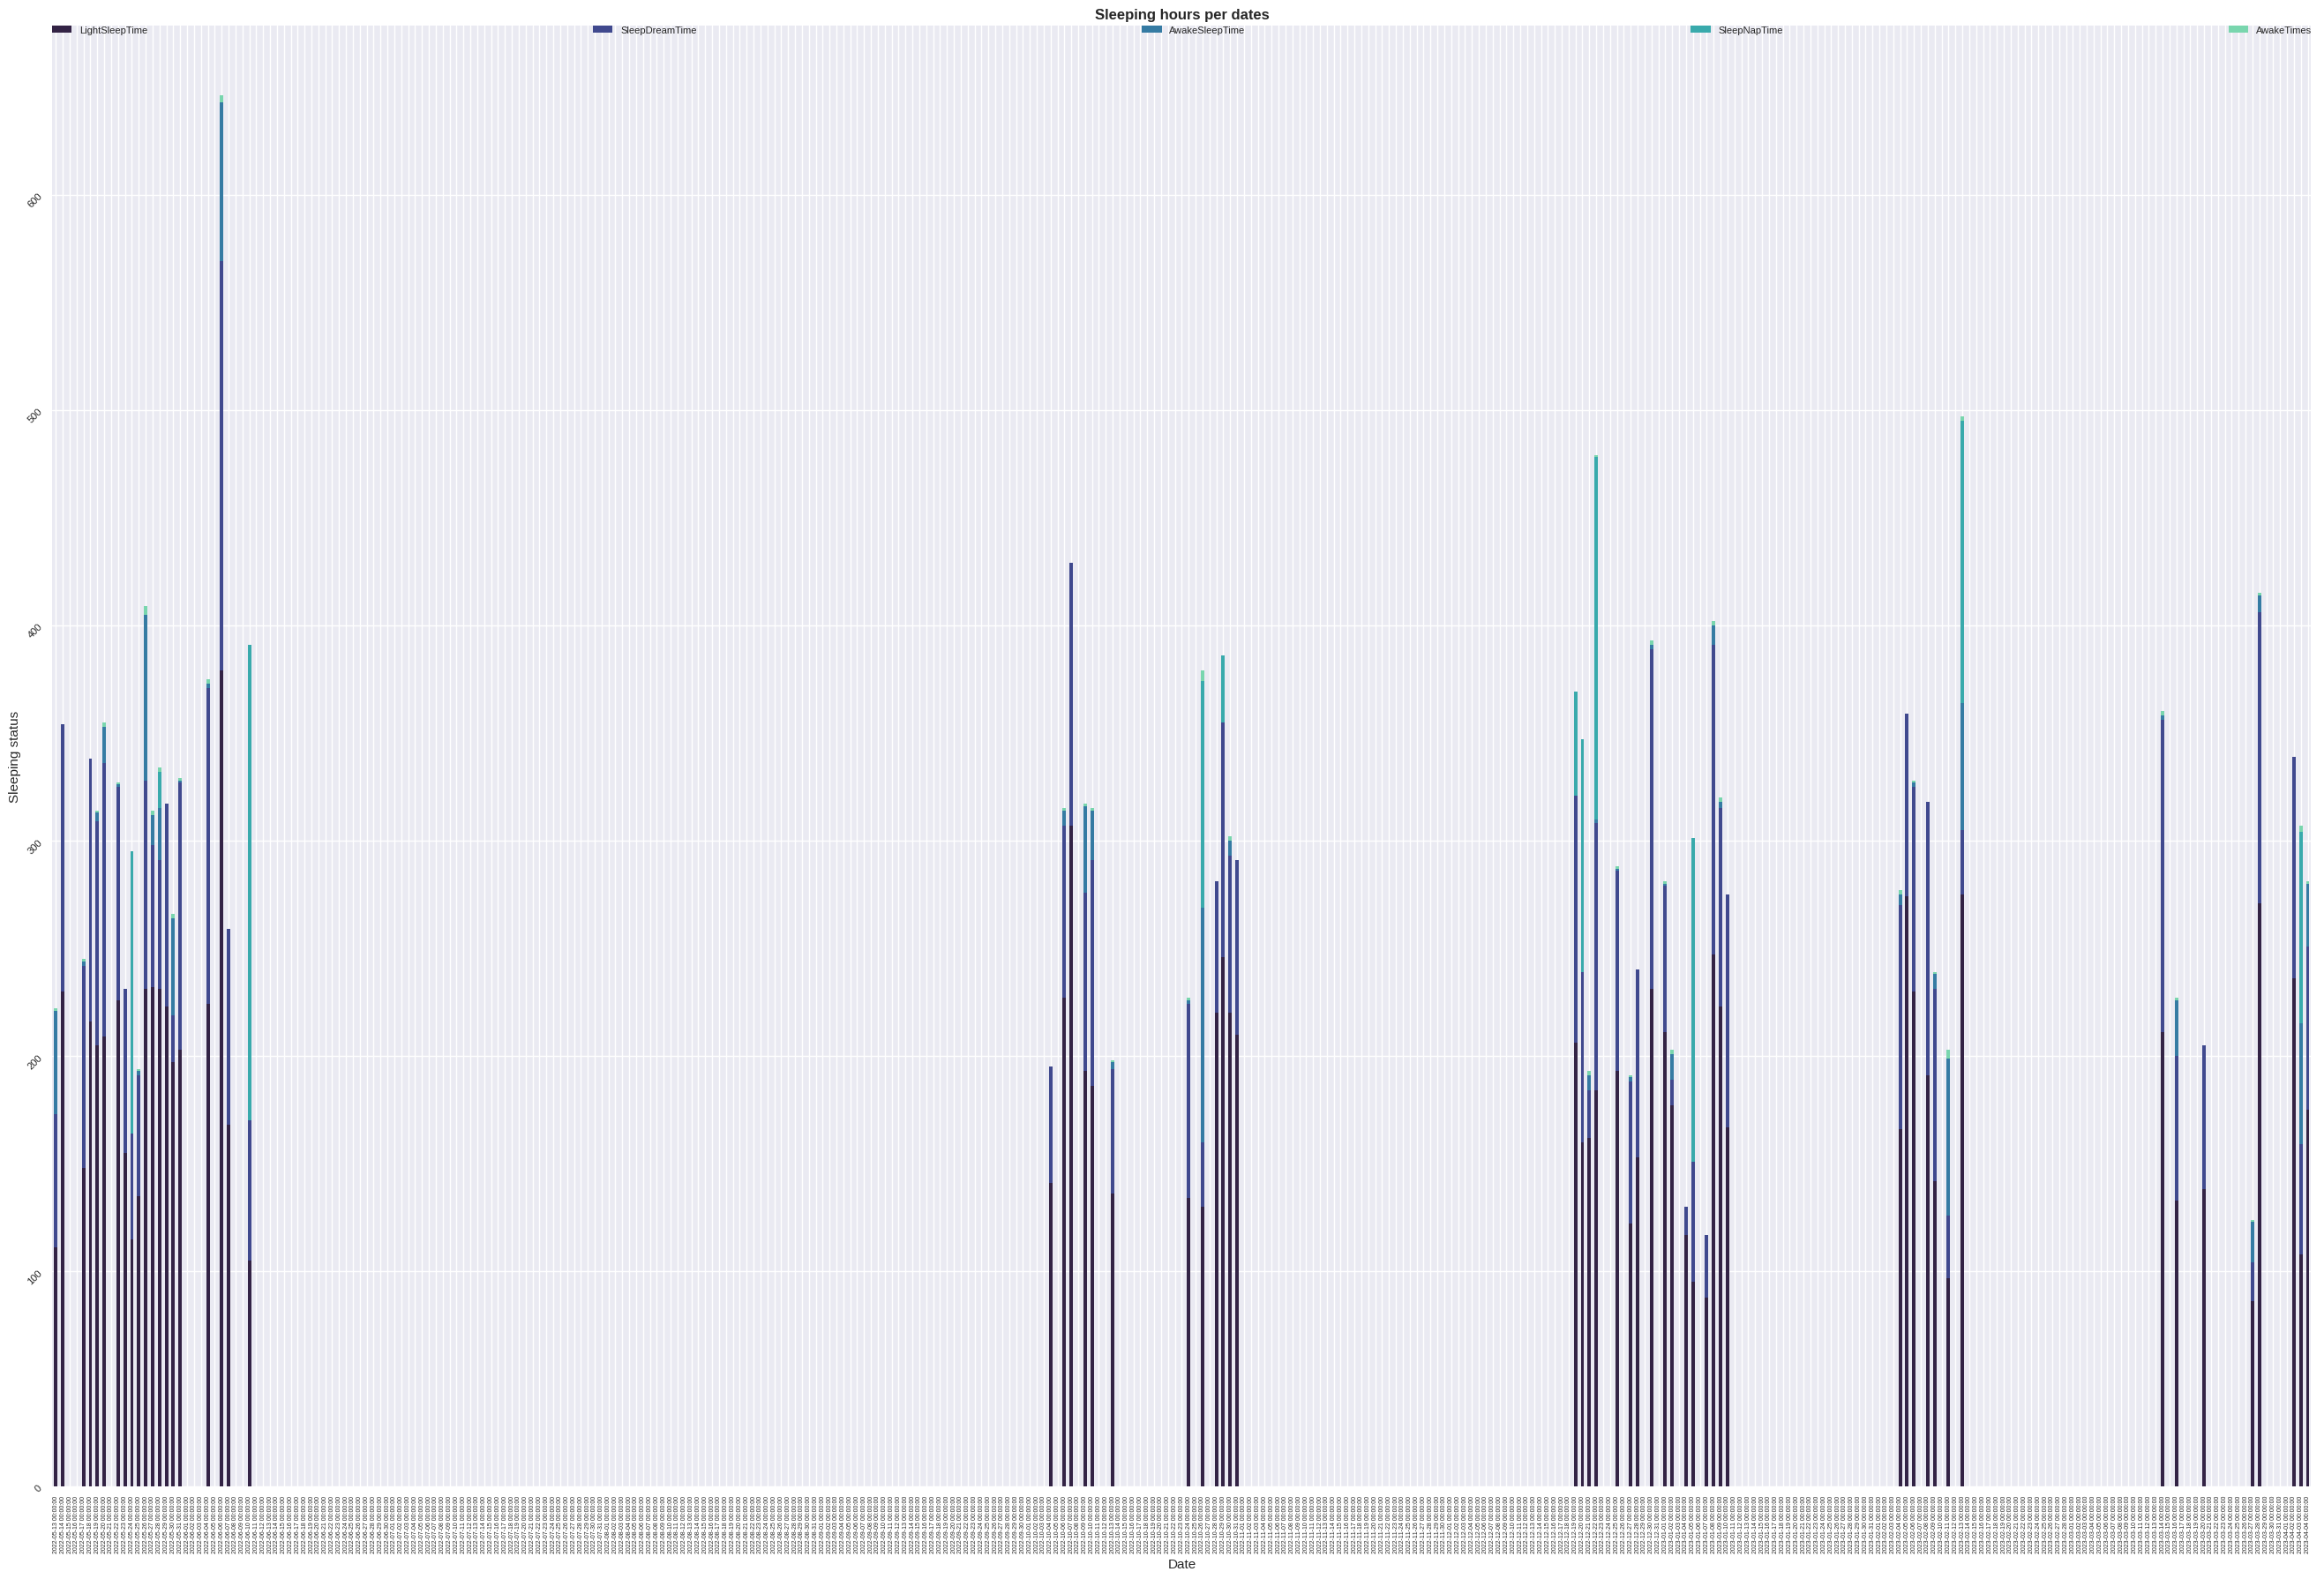

Exported Sleep data to /content/drive/MyDrive/WearablesData/Dataset/Plotting/Huawei_Fit_Features/Sleep_data.csv
************************************************************
************************************************************
Print content of Heart feature
table with index 0 ('m_14_HeartRateByDay_10966000026997291',)
sql_stmt SELECT TimeStamp,MaxRate,MinRate,AverageRestRate FROM m_14_HeartRateByDay_10966000026997291
Plot feature Data 


<Figure size 800x550 with 0 Axes>

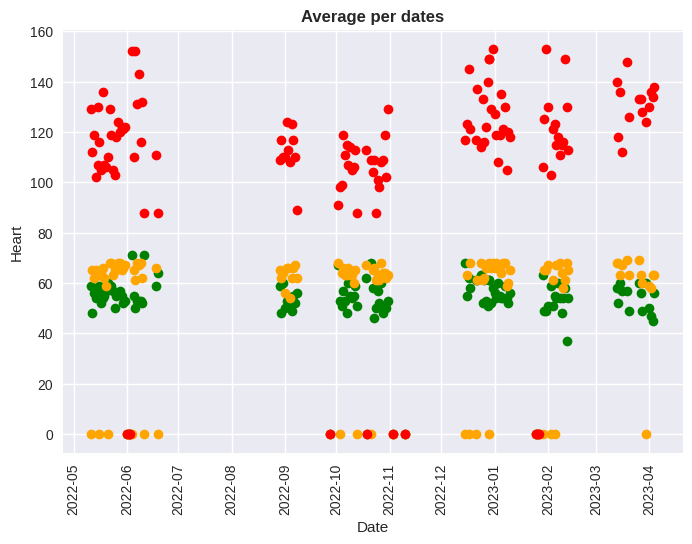

TimeStamp          datetime64[ns]
MaxRate                     int64
MinRate                     int64
AverageRestRate             int64
dtype: object
|     | TimeStamp           |   MaxRate |   MinRate |   AverageRestRate |
|----:|:--------------------|----------:|----------:|------------------:|
|   0 | 2022-05-11 00:00:00 |       129 |        59 |                 0 |
|   2 | 2022-05-14 00:00:00 |       102 |        54 |                65 |
|   4 | 2022-05-13 00:00:00 |       119 |        56 |                62 |
|   6 | 2022-05-12 00:00:00 |       112 |        48 |                65 |
|   8 | 2022-05-16 00:00:00 |       116 |        59 |                 0 |
|  10 | 2022-05-15 00:00:00 |       130 |        56 |                63 |
|  11 | 2022-05-15 00:00:00 |       107 |        56 |                63 |
|  12 | 2022-05-17 00:00:00 |       105 |        52 |                64 |
|  14 | 2022-05-18 00:00:00 |       136 |        54 |                66 |
|  16 | 2022-05-19 00:00:00 |       

<Figure size 800x550 with 0 Axes>

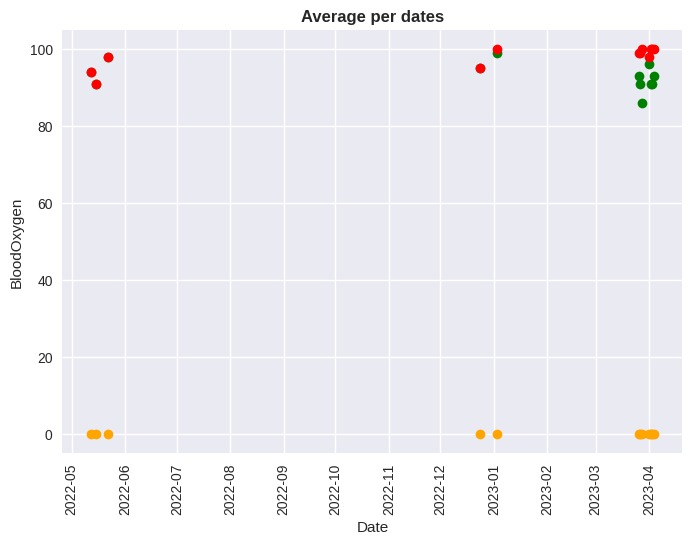

TimeStamp             datetime64[ns]
MaxBloodOxygen                 int64
MinBloodOxygen                 int64
AverageBloodOxygen             int64
dtype: object
|    | TimeStamp           |   MaxBloodOxygen |   MinBloodOxygen |   AverageBloodOxygen |
|---:|:--------------------|-----------------:|-----------------:|---------------------:|
|  0 | 2022-05-12 00:00:00 |               94 |               94 |                    0 |
|  1 | 2022-05-15 00:00:00 |               91 |               91 |                    0 |
|  2 | 2022-05-22 00:00:00 |               98 |               98 |                    0 |
|  3 | 2022-12-24 00:00:00 |               95 |               95 |                    0 |
|  4 | 2023-01-03 00:00:00 |              100 |               99 |                    0 |
|  5 | 2023-03-26 00:00:00 |               99 |               93 |                    0 |
|  6 | 2023-03-27 00:00:00 |               99 |               91 |                    0 |
|  7 | 2023-03-28 00:00:00 |

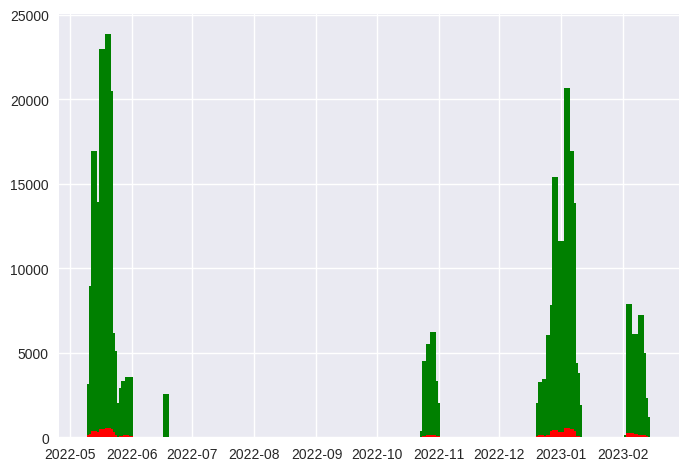

<ipython-input-49-6cfea4ffd205>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


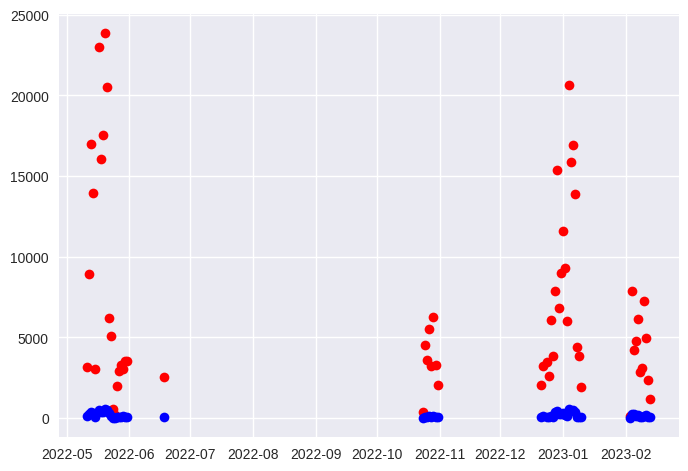

Exported Activity data to /content/drive/MyDrive/WearablesData/Dataset/Plotting/Huawei_Fit_Features/Activity_data.csv
************************************************************
************************************************************
Print content of Stress feature
table with index 0 ('m_14_StressDataByDay_10966000026997291',)
sql_stmt SELECT TimeStamp,MaxStress,MinStress,AverageStress FROM m_14_StressDataByDay_10966000026997291
Plot feature Data 


<Figure size 800x550 with 0 Axes>

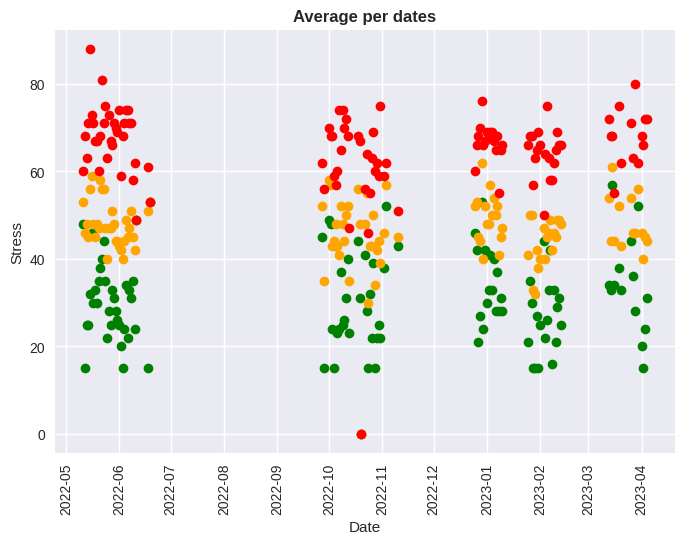

TimeStamp        datetime64[ns]
MaxStress                 int64
MinStress                 int64
AverageStress           float64
dtype: object
|     | TimeStamp           |   MaxStress |   MinStress |   AverageStress |
|----:|:--------------------|------------:|------------:|----------------:|
|   0 | 2022-05-11 00:00:00 |          60 |          48 |              53 |
|   1 | 2022-05-14 00:00:00 |          71 |          25 |              45 |
|   2 | 2022-05-13 00:00:00 |          63 |          25 |              48 |
|   3 | 2022-05-12 00:00:00 |          68 |          15 |              46 |
|   4 | 2022-05-16 00:00:00 |          73 |          46 |              59 |
|   5 | 2022-05-15 00:00:00 |          88 |          32 |              56 |
|   6 | 2022-05-17 00:00:00 |          71 |          30 |              48 |
|   7 | 2022-05-18 00:00:00 |          67 |          33 |              45 |
|   8 | 2022-05-19 00:00:00 |          67 |          30 |              48 |
|   9 | 2022-05-20 00:

In [ ]:
with connection:
  # list_feature =  ['Sleep', 'Heart','BloodOxygen','BloodPressure','Temprature','Activity','Stress']

  for f in no_of_feature:
    f=list_feature[f-1]
    print("************************************************************")
    print("Print content of " +f+ " feature")

    if f == "Heart" or f == "BloodOxygen" or f == "Stress":
        if f == "Heart":
            MasterTable = HeartMasterTable
        elif f == "BloodOxygen":
            MasterTable = BloodOxygenMasterTable
        elif f == "Stress":
            MasterTable = StressMasterTable
        df = getMasterTableData(connection, f, MasterTable)

        print("Plot feature Data ")
        plotTimeSeries_Min_Max_Avg(df, f)
        print(df.dtypes)
        print(df.to_markdown())

        # Export data as CSV
        csv_filename = path + f + "_data.csv"
        df.to_csv(csv_filename, index=False)
        print(f"Exported {f} data to {csv_filename}")

    elif f == "Sleep":
        MasterTable = SleepMasterTable
        df = getSleepData(connection)
        print(df.size)
        print(df.dtypes)
        print(df.to_markdown())
        print("Plot Sleep Data ")
        df_stat = getSleepStatistics(df)
        plotSleepStatistics(df_stat)
        # plotTimeSeries_Sleep(df)
        plotTimeSeries_SleepStatus(df)

        # Export data as CSV
        csv_filename = path + f + "_data.csv"
        df.to_csv(csv_filename, index=False)
        print(f"Exported {f} data to {csv_filename}")

    elif f == "Activity":
        MasterTable = SportMasterTable
        df = getStepsCaloriesData(connection)
        print(df.dtypes)
        print(df.to_markdown())
        print("Plot Activity ")
        plotTimeSeries_Activity(df)

        # Export data as CSV
        csv_filename = path + f + "_data.csv"
        df.to_csv(csv_filename, index=False)
        print(f"Exported {f} data to {csv_filename}")

    elif f == "SpO2":
        MasterTable = BloodOxygenMasterTable
        print("NA")

    print("************************************************************")

In [ ]:
with connection:
  print("2. print selective tables - Selective Logical Extraction - Mapping")
  #HeartTable,SleepTable,SpO2Table,BloodOxygenTable,StressTable=getSelectiveTables(connection,list_table,no_of_table,list_feature,no_of_feature)
  SportTable,HeartTable,SleepTable,SpO2Table,BloodOxygenTable,StressTable,SportMasterTable,HeartMasterTable,SleepMasterTable,SpO2MasterTable,BloodOxygenMasterTable,StressMasterTable=getSelectiveAndMasterTables(connection,list_table,no_of_table,list_feature,no_of_feature)


2. print selective tables - Selective Logical Extraction - Mapping
Slective SportTable: [] 0
Slective HeartTable: [('m_14_HeartRateByDay_10966000026997291',)] 1
Slective SleepTable: [('m_14_SleepDataByDay_10966000026997291',), ('m_14_FineSleepStatusTable_10966000026997291',), ('m_14_FineSleepDayTable_10966000026997291',), ('m_14_FineSleepDayMergeTable_10966000026997291',), ('m_14_FineSleepMergeTable_10966000026997291',)] 5
Slective SpO2Table: [] 0
Slective BloodOxygenTable: [('m_14_BloodOxygenByDay_10966000026997291',)] 1
Slective StressTable: [('m_14_StressDataByDay_10966000026997291',)] 1
Master SportTable: [] 0
Master HeartTable: [('m_14_HeartRateByDay_10966000026997291',)] 1
Master SleepTable: [('m_14_SleepDataByDay_10966000026997291',)] 1
Master SpO2Table: [] 0
Master BloodOxygenTable: [('m_14_BloodOxygenByDay_10966000026997291',)] 1
Master StressTable: [('m_14_StressDataByDay_10966000026997291',)] 1
